In [46]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
from scipy.stats import norm # type: ignore
import altair as alt # type : ignore
from typing import Optional
from functools import reduce
from itertools import chain
Vcat = lambda R,S: R & S
Ocat = lambda C,D: C + D

from models import df, COLORS_by_TYPE


types = set(chain.from_iterable(df[['type1', 'type2']].values)) - {np.nan}

ordering = pd.DataFrame(np.ones((len(types), len(types))), columns=types, index=types)



class PokeDescribe: 
    def __init__(self, datf: pd.DataFrame): 
        self.TYPE_COLOR_MAPPING = COLORS_by_TYPE
        self.HEIGHT = 30
        self.WIDTH = 330
        self.xlim = (0, 180)
        self.stats = ['hp', 'attack', 'defense', 
                      'sp_attack', 'sp_defense', 'speed']
        self.df = datf
        self.x = np.linspace(self.xlim[0], self.xlim[1], 1000)
        self.gaussians = {name: norm(loc=self.df[name].mean(), 
                                     scale=self.df[name].std()) 
                          for name in self.stats}
        self.bells = pd.DataFrame({**{'x': self.x}, 
                                   **{name: self.gaussians[name].pdf(self.x) 
                                      for name in self.stats}})
        self.C = alt.Chart(self.bells, 
                           height=self.HEIGHT, 
                           width=self.WIDTH
                          ).mark_line(color='white').encode(
            x=alt.X('x', title=None, axis=alt.Axis(labels=False)))
        self.charts = {name: self.C.encode(y=alt.Y(name, title=None, axis=alt.Axis(labels=False))) for name in self.stats}
        self.BellCurves = reduce(Vcat, [self.charts[name] for name in self.stats])

class PokeDescribeNAME(PokeDescribe): 
    def __init__(self, datf: pd.DataFrame, Name: str): 
        super().__init__(datf)
        self.PSI = 50
        self.pokename = Name
        self.typ = self.df[self.df.name==self.pokename].type1.values[0]
        self.typ_color = self.TYPE_COLOR_MAPPING[self.typ]
        self.y_max = 1.3 * max([max(ls) for ls in [self.gaussians[st].pdf(self.x) for st in self.stats]])
        self.y = pd.DataFrame({'y': np.linspace(0, self.y_max, self.PSI)})
        self.D = alt.Chart(self.y).mark_line(color=self.typ_color).encode(y=alt.Y('y', title=None))
        self.means = {st: self.df[self.df.name==self.pokename][st].mean() for st in self.stats}
        self.Dcharts = {st: self.D.encode(x=alt.value(self.means[st]))
                        for st in self.stats}
        self.SHOW = reduce(Vcat, [self.charts[st] + self.Dcharts[st] 
                                  for st in self.stats]
                          ).configure_text(color='white', angle=90)


In [47]:
abra = PokeDescribeNAME(df, Name="Abra")

blastoise = PokeDescribeNAME(df, Name="Blastoise")

raichu = PokeDescribeNAME(df, Name="Raichu")

zigzagoon = PokeDescribeNAME(df, Name="Zigzagoon")

mewtwo = PokeDescribeNAME(df, Name="Mewtwo")

pidgey = PokeDescribeNAME(df, Name="Pidgey")

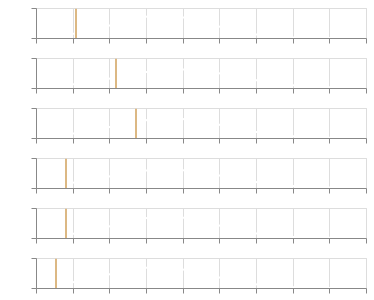

In [48]:
PokeDescribeNAME(df, Name="Geodude").SHOW

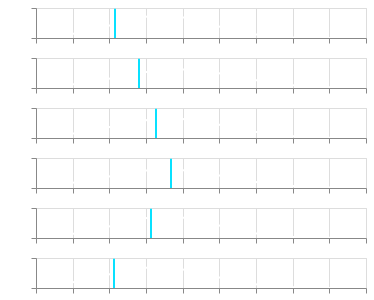

In [49]:
blastoise.SHOW

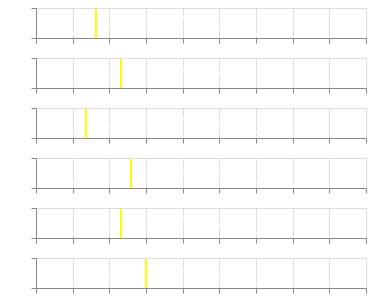

In [50]:
raichu.SHOW#.save('raichu.html')

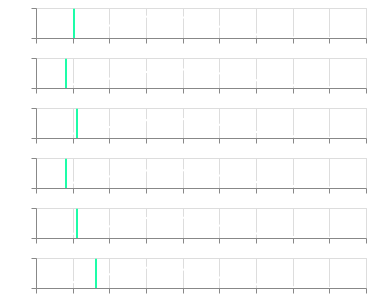

In [51]:
zigzagoon.SHOW

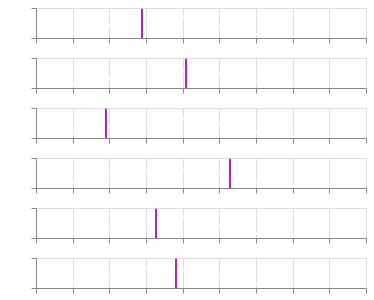

In [52]:
mewtwo.SHOW

# This can go directly to json, so you may not have to replicate it yourself!

In [38]:
# mewtwo.SHOW.to_json()

df[df.name.isna()].name_g6.values

array(['VenusaurMega Venusaur', 'CharizardMega Charizard X',
       'CharizardMega Charizard Y', 'BlastoiseMega Blastoise',
       'BeedrillMega Beedrill', 'PidgeotMega Pidgeot',
       'AlakazamMega Alakazam', 'SlowbroMega Slowbro',
       'GengarMega Gengar', 'KangaskhanMega Kangaskhan',
       'PinsirMega Pinsir', 'GyaradosMega Gyarados',
       'AerodactylMega Aerodactyl', 'MewtwoMega Mewtwo X',
       'MewtwoMega Mewtwo Y', 'AmpharosMega Ampharos',
       'SteelixMega Steelix', 'ScizorMega Scizor',
       'HeracrossMega Heracross', 'HoundoomMega Houndoom',
       'TyranitarMega Tyranitar', 'Ho-oh', 'SceptileMega Sceptile',
       'BlazikenMega Blaziken', 'SwampertMega Swampert',
       'GardevoirMega Gardevoir', 'SableyeMega Sableye',
       'MawileMega Mawile', 'AggronMega Aggron', 'MedichamMega Medicham',
       'ManectricMega Manectric', 'SharpedoMega Sharpedo',
       'CameruptMega Camerupt', 'AltariaMega Altaria',
       'BanetteMega Banette', 'AbsolMega Absol', 'GlalieMega G

In [41]:
# x=zigzagoon.SHOW.to_json()

# w
# print(x)


df[~df.name.isna()].name

0       Bulbasaur
1         Ivysaur
2        Venusaur
3      Charmander
4      Charmeleon
5       Charizard
6        Squirtle
7       Wartortle
8       Blastoise
9        Caterpie
10        Metapod
11     Butterfree
12         Weedle
13         Kakuna
14       Beedrill
15         Pidgey
16      Pidgeotto
17        Pidgeot
18        Rattata
19       Raticate
20        Spearow
21         Fearow
22          Ekans
23          Arbok
24        Pikachu
25         Raichu
26      Sandshrew
27      Sandslash
28       Nidoran♀
29       Nidorina
          ...    
771    Type: Null
772      Silvally
773        Minior
774        Komala
775    Turtonator
776    Togedemaru
777       Mimikyu
778       Bruxish
779        Drampa
780      Dhelmise
781      Jangmo-o
782      Hakamo-o
783       Kommo-o
784     Tapu Koko
785     Tapu Lele
786     Tapu Bulu
787     Tapu Fini
788        Cosmog
789       Cosmoem
790      Solgaleo
791        Lunala
792      Nihilego
793      Buzzwole
794     Pheromosa
795     Xu

In [53]:
def writejsons(name: str): 
    f=open("bellcurve_jsons/"+name+"_bellcurve_2.json", 'w')
    f.write(PokeDescribeNAME(df, Name=name).SHOW.to_json())
    f.close()
    pass

for n in df[~df.name.isna()].name: 
    writejsons(n)


In [81]:
#print(mewtwo.SHOW.vconcat[0].layer[0].to_json())


# f = open("mewtwo_bell_partial_left.json", "w")
# g = open("mewtwo_bell_partial_right.json", "w")
# f.write(mewtwo.SHOW.vconcat[2].layer[0].to_json())
# g.write(mewtwo.SHOW.vconcat[2].layer[1].to_json())
# f.close()
# g.close()

print(mewtwo.SHOW.vconcat[0].to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.6.0.json",
  "config": {
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "datasets": {
    "data-befba9a85dc339b9acaf9ca72544468e": [
      {
        "y": 0.0
      },
      {
        "y": 0.0003982600187315486
      },
      {
        "y": 0.0007965200374630972
      },
      {
        "y": 0.0011947800561946458
      },
      {
        "y": 0.0015930400749261944
      },
      {
        "y": 0.001991300093657743
      },
      {
        "y": 0.0023895601123892917
      },
      {
        "y": 0.00278782013112084
      },
      {
        "y": 0.0031860801498523887
      },
      {
        "y": 0.0035843401685839373
      },
      {
        "y": 0.003982600187315486
      },
      {
        "y": 0.004380860206047035
      },
      {
        "y": 0.004779120224778583
      },
      {
        "y": 0.005177380243510132
      },
      {
        "y": 0.00557564026224168
      },
      {
        "y": 0.005973900280